In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [2]:
salary_data=pd.read_csv('salaries.csv')
salary_data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
x=salary_data.drop('salary_more_then_100k',axis=1)
y=salary_data['salary_more_then_100k']


In [4]:
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [6]:
# Preprocessing using Labelencoder
le_comp=LabelEncoder()
x['company']=le_comp.fit_transform(x['company'])

le_job=LabelEncoder()
x['job']=le_job.fit_transform(x['job'])

le_degree=LabelEncoder()
x['degree']=le_degree.fit_transform(x['degree'])

In [7]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [8]:
model=DecisionTreeClassifier() #create tree to its complete depth

In [9]:
model.fit(x,y)

DecisionTreeClassifier()

In [10]:
model.get_depth()

5

In [11]:
model.score(x,y)

1.0

In [12]:
# giving a maxdepth val(hyperparameter)
model2=DecisionTreeClassifier(max_depth=3)
model2.fit(x,y)
model2.score(x,y)

0.9375

In [13]:
y_pred=model2.predict(x)
pd.DataFrame({'True values':y,'Predictions':y_pred})

,True values,Predictions
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,1


In [14]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[6 0]
 [1 9]]


Text(50.722222222222214, 0.5, 'True Values')

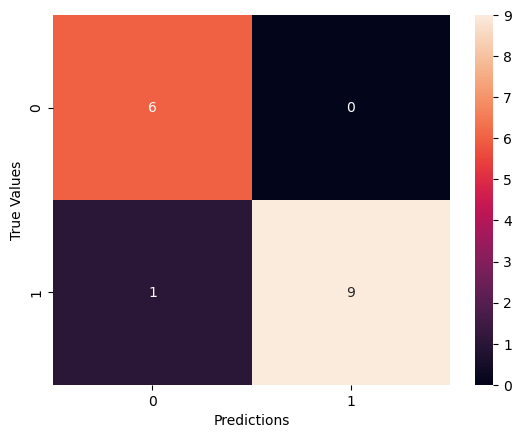

In [15]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')

In [16]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.90      0.95        10

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# making predictions
company=input('Enter the company: abc pharma, google, facebook \n')
company=int(le_comp.transform([[company]]))

job=input('Enter the job title: sales executive, business manager,computer programmer \n')
job=int(le_job.transform([[job]]))

degree=input('Enter the degree: masters,bachelors \n')
degree=int(le_degree.transform([[degree]]))

Enter the company: abc pharma, google, facebook 
google
Enter the job title: sales executive, business manager,computer programmer 
sales executive
Enter the degree: masters,bachelors 
masters


In [19]:
# predicting the salaray
model2.predict([[company,job,degree]])

array([0], dtype=int64)

In [23]:
# creating decsision tree
from sklearn import tree
# print(tree.export_text(model2))

[Text(0.4444444444444444, 0.875, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = a'),
 Text(0.2222222222222222, 0.625, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = s'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = s'),
 Text(0.3333333333333333, 0.375, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = s'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = a'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = s'),
 Text(0.6666666666666666, 0.625, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = a'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = a'),
 Text(0.7777777777777778, 0.375, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = s'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = a'),
 Text(0.8888888888888888, 0.125, 'gini =

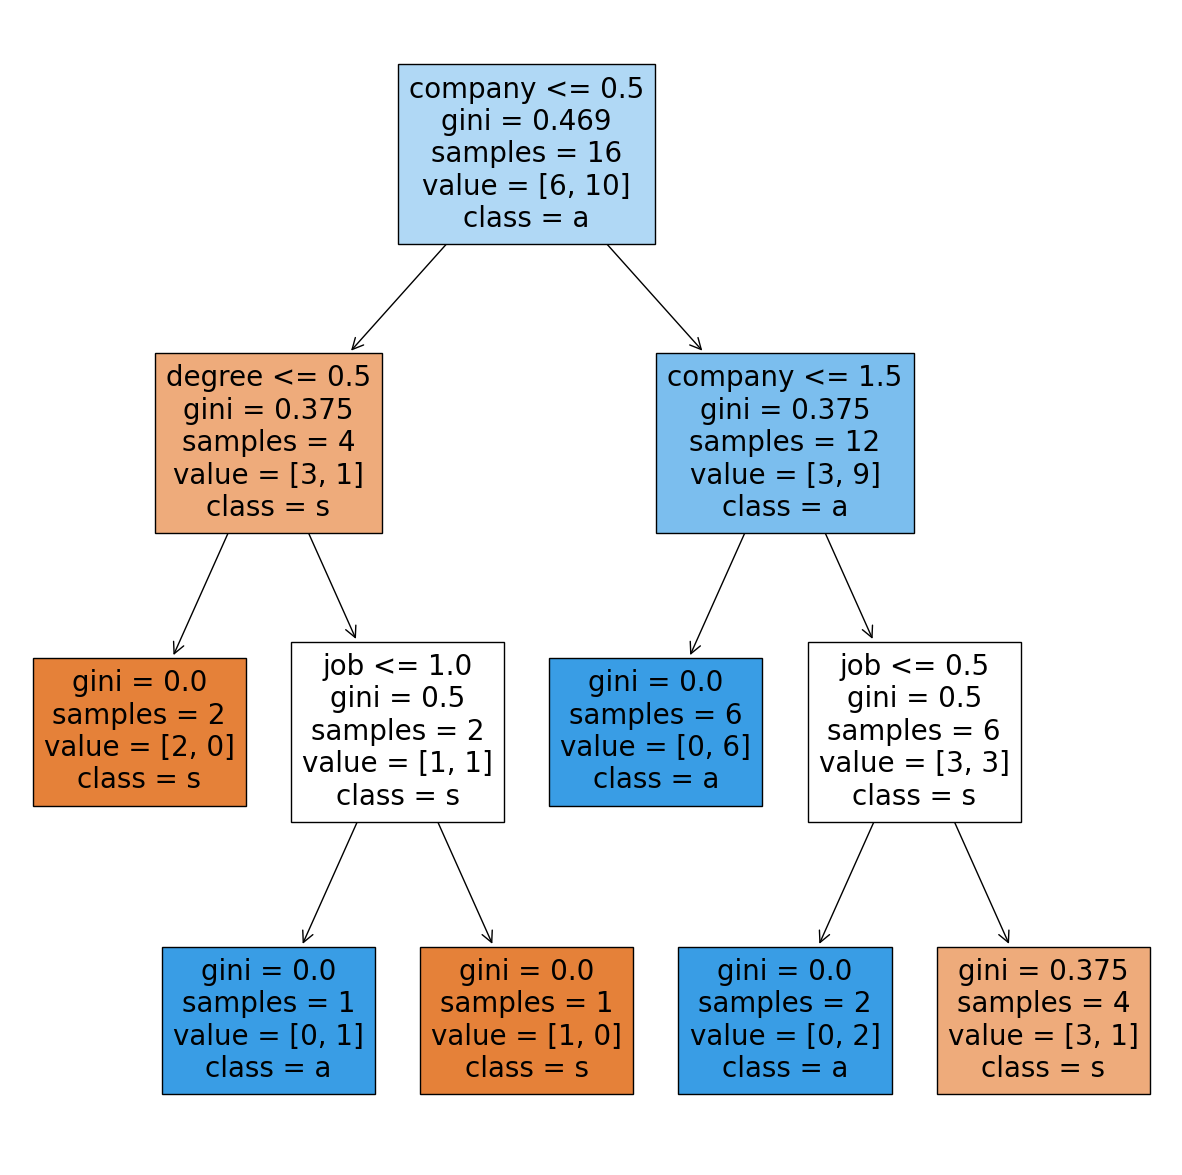

In [21]:
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model2,feature_names=x.columns,class_names='salary_more_then_100k',filled=True)

[Text(0.36363636363636365, 0.9166666666666666, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = a'),
 Text(0.18181818181818182, 0.75, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = s'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = s'),
 Text(0.2727272727272727, 0.5833333333333334, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = s'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = a'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = s'),
 Text(0.5454545454545454, 0.75, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = a'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = a'),
 Text(0.6363636363636364, 0.5833333333333334, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = s'),
 Text(0.5454545454545454, 0.41666

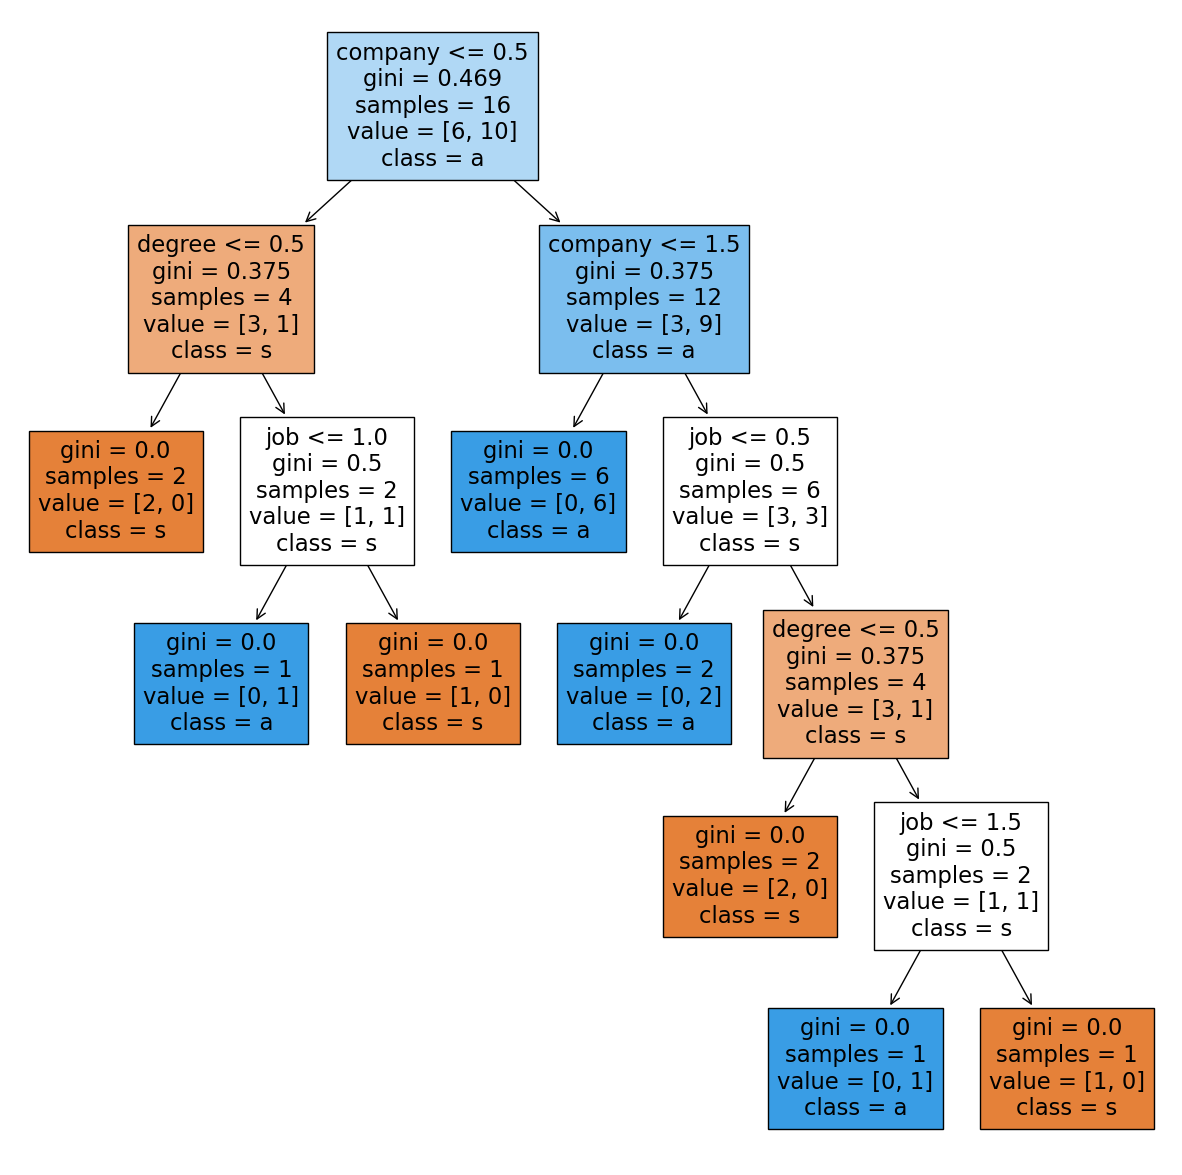

In [24]:
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=x.columns,class_names='salary_more_then_100k',filled=True)